## Proyecto 2-Parte I (Core) de Elida Peña

**Proyecto 2: Análisis Inicial y Selección de Problema**

**Objetivo:** Realizar un análisis exploratorio de datos (EDA) inicial para al menos cuatro conjuntos de datos, diagnosticar y elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción). Entregar un repositorio con el dataset elegido, el EDA inicial y la problemática seleccionada.

**Parte I: Búsqueda y Análisis de Conjuntos de Datos**

**Instrucciones**

**1. Búsqueda de Conjuntos de Datos:**

Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.

**2. Análisis Exploratorio de Datos (EDA) Inicial:**
* Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.

* Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.

* Documentar los hallazgos de cada EDA en un notebook de Jupyter.

**3. Diagnóstico y Selección de Problema:**
* Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.

* Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).

* Justificar la elección del problema y explicar por qué es relevante y desafiante.

**4. Creación del Repositorio en GitHub:**

* Crear un repositorio en GitHub para el Proyecto 2.

* Incluir el EDA inicial de los cuatro conjuntos de datos en notebooks separados.

* Incluir una carpeta para el dataset elegido con su EDA correspondiente.

* Documentar la problemática seleccionada y justificar la elección en un archivo README.md.

**Detalles del EDA Inicial**

**1. Descripción del Conjunto de Datos:**

* Breve descripción de cada conjunto de datos, incluyendo la fuente, el tamaño y las variables.

**2.Análisis Estadístico Descriptivo:**
* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.

* Analizar la distribución de las variables categóricas.

**3. Visualizaciones:**
* Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).

* Visualizar las correlaciones entre variables (mapa de calor de correlación).

**4. Identificación de Valores Nulos y Outliers:**
* Detectar valores nulos y discutir cómo podrían ser tratados.

* Identificar outliers y evaluar su impacto potencial en el análisis.

**5.Resumen de Hallazgos:**

* Resumir los principales hallazgos de cada EDA, destacando las características y desafíos únicos de cada conjunto de datos.

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* Dataset de medical_students_dataset

In [6]:
#Cargar el dataset y revisar su estructura básica.
# Cargar el dataset
path = "../data/medical_students_dataset.csv"
df_medical = pd.read_csv(path, sep=',')

# Revisar la estructura básica del dataset
print("Primeras 5 filas del dataset:")
print(df_medical.head())

print("\nInformación del dataset:")
print(df_medical.info())  # Información sobre columnas, tipos de datos y valores nulos.

print("\nDescripción estadística básica:")
print(df_medical.describe())  # Estadísticas básicas del dataset.


Primeras 5 filas del dataset:
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>

In [13]:
# Detectar valores duplicados
duplicados = df_medical.duplicated()
#Imprime la cantidad de numeros duplicados
print(f"Número de filas duplicadas: {duplicados.sum()}")
df_medical.head()

Número de filas duplicadas: 7644


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,22.671401,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,22.671401,98.480008,95.0,NaN,231.0,No,No


In [15]:
# Rellenar sólo las columnas numéricas con la media
numeric_cols = df_medical.select_dtypes(include=['number']).columns
df_medical[numeric_cols] = df_medical[numeric_cols].fillna(df_medical[numeric_cols].mean())


In [17]:
# Rellenar columnas categóricas con un valor fijo
df_medical[['Gender', 'Blood Type', 'Diabetes', 'Smoking']] = df_medical[['Gender', 'Blood Type', 'Diabetes', 'Smoking']].fillna('Desconocido')


In [18]:
# Verificar si quedan valores NaN
print(df_medical.isnull().sum())


Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


In [19]:
# Eliminar valores duplicados
new_data_frame = df_medical.drop_duplicates()

# Verificar que se han eliminado los duplicados
print(f"Número de filas después de eliminar duplicados: {duplicados.sum()}")
df_medical.head()

Número de filas después de eliminar duplicados: 7644


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.000000,18.000000,Female,161.777924,72.354947,O,27.645835,98.600948,95.0,109.000000,203.0,No,Desconocido
1,2.000000,26.021561,Male,152.069157,47.630941,B,22.671401,98.714977,93.0,104.000000,163.0,No,No
2,3.000000,32.000000,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.000000,216.0,Yes,No
3,49974.042078,30.000000,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.000000,141.0,No,Yes
4,5.000000,23.000000,Female,174.947103,46.234173,O,22.671401,98.480008,95.0,114.558033,231.0,No,No


In [20]:
# Verificacion de tipos de datos de las columnas
new_data_frame.dtypes

Student ID        float64
Age               float64
Gender             object
Height            float64
Weight            float64
Blood Type         object
BMI               float64
Temperature       float64
Heart Rate        float64
Blood Pressure    float64
Cholesterol       float64
Diabetes           object
Smoking            object
dtype: object

In [21]:
# Convertir columnas numéricas a enteros si es necesario
df_medical['Student ID'] = df_medical['Student ID'].astype('int64')
df_medical['Age'] = df_medical['Age'].astype('int64')

# Convertir columnas categóricas
df_medical['Gender'] = df_medical['Gender'].astype('category')
df_medical['Blood Type'] = df_medical['Blood Type'].astype('category')
df_medical['Diabetes'] = df_medical['Diabetes'].astype('category')
df_medical['Smoking'] = df_medical['Smoking'].astype('category')

# Convertir booleanos si es necesario
df_medical['Smoking'] = df_medical['Smoking'].map({'Yes': True, 'No': False})
df_medical['Diabetes'] = df_medical['Diabetes'].map({'Yes': True, 'No': False})

# Verificar los tipos de datos después de las conversiones
print(df_medical.dtypes)


Student ID           int64
Age                  int64
Gender            category
Height             float64
Weight             float64
Blood Type        category
BMI                float64
Temperature        float64
Heart Rate         float64
Blood Pressure     float64
Cholesterol        float64
Diabetes            object
Smoking             object
dtype: object


In [22]:
# Ejemplo para las columnas categóricas
print(df_medical['Gender'].unique())
print(df_medical['Blood Type'].unique())
print(df_medical['Smoking'].unique())


['Female', 'Male', 'Desconocido']
Categories (3, object): ['Desconocido', 'Female', 'Male']
['O', 'B', 'A', 'AB', 'Desconocido']
Categories (5, object): ['A', 'AB', 'B', 'Desconocido', 'O']
[nan False True]


In [23]:
# Verificar estadísticas básicas
print(df_medical[['Age', 'Height', 'Weight', 'BMI']].describe())


                 Age         Height         Weight            BMI
count  200000.000000  200000.000000  200000.000000  200000.000000
mean       26.019405     174.947103      69.971585      23.272123
std         4.639565      13.706155      16.433632       6.675617
min        18.000000     150.000041      40.000578      10.074837
25%        22.000000     163.859439      56.626643      18.382809
50%        26.000000     174.947103      69.971585      22.671401
75%        30.000000     186.079360      83.316641      27.255521
max        34.000000     199.998639      99.999907      44.355113


In [24]:
# Buscar valores nulos
print(df_medical.isnull().sum())

# Buscar valores fuera de rango
print(df_medical[df_medical['Age'] < 0])  # Edades negativas
print(df_medical[df_medical['BMI'] > 50])  # BMI muy altos


Student ID            0
Age                   0
Gender                0
Height                0
Weight                0
Blood Type            0
BMI                   0
Temperature           0
Heart Rate            0
Blood Pressure        0
Cholesterol           0
Diabetes          20000
Smoking           20000
dtype: int64
Empty DataFrame
Columns: [Student ID, Age, Gender, Height, Weight, Blood Type, BMI, Temperature, Heart Rate, Blood Pressure, Cholesterol, Diabetes, Smoking]
Index: []
Empty DataFrame
Columns: [Student ID, Age, Gender, Height, Weight, Blood Type, BMI, Temperature, Heart Rate, Blood Pressure, Cholesterol, Diabetes, Smoking]
Index: []


In [25]:
# Corrección manual de valores inconsistentes en 'Gender'
df_medical['Gender'] = df_medical['Gender'].replace({'F': 'Female', 'M': 'Male'})


In [27]:
# Convertir todos los valores de la columna a tipo string (incluidos NaN)
df_medical['Smoking'] = df_medical['Smoking'].astype(str)

# Uniformar valores: convertir todo a minúsculas
df_medical['Smoking'] = df_medical['Smoking'].str.lower()

# Reemplazar valores específicos si es necesario
df_medical['Smoking'] = df_medical['Smoking'].replace({'yes': 'Yes', 'no': 'No', 'nan': 'Unknown'})



In [28]:
# Ver valores únicos en la columna 'Smoking'
print(df_medical['Smoking'].unique())


['Unknown' 'false' 'true']


In [29]:
# Reemplazar edades negativas con NaN y luego rellenar con la media
df_medical.loc[df_medical['Age'] < 0, 'Age'] = None
df_medical['Age'] = df_medical['Age'].fillna(df_medical['Age'].mean())
# Truncar valores extremos en 'BMI' a un máximo razonable
df_medical.loc[df_medical['BMI'] > 50, 'BMI'] = 50


In [32]:
df_medical['Diabetes'] = df_medical['Diabetes'].fillna('Unknown')

In [33]:
valores_faltantes = df_medical.isnull().sum()
print(valores_faltantes)

Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


In [36]:
# Estadísticas descriptivas de las variables numéricas
print("Estadísticas descriptivas:")
print(df_medical.describe())

# Análisis de variables categóricas
categorical_cols = df_medical.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"Frecuencia de valores en {col}:\n{df_medical[col].value_counts()}\n")


Estadísticas descriptivas:
          Student ID            Age         Height         Weight  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean    49974.037870      26.019405     174.947103      69.971585   
std     27397.626083       4.639565      13.706155      16.433632   
min         1.000000      18.000000     150.000041      40.000578   
25%     27730.000000      22.000000     163.859439      56.626643   
50%     49974.000000      26.000000     174.947103      69.971585   
75%     72214.000000      30.000000     186.079360      83.316641   
max    100000.000000      34.000000     199.998639      99.999907   

                 BMI    Temperature     Heart Rate  Blood Pressure  \
count  200000.000000  200000.000000  200000.000000   200000.000000   
mean       23.272123      98.600948      79.503767      114.558033   
std         6.675617       0.474844      10.948518       13.664217   
min        10.074837      96.397835      60.000000       90.000000   
2

In [41]:
import numpy as np

# Reemplazar 'Unknown' con NaN
df_medical = df_medical.replace('Unknown', np.nan)

# Rellenar columnas numéricas con la media
numeric_cols = df_medical.select_dtypes(include=['float64', 'int64'])
df_medical[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

# Rellenar columnas categóricas con la moda
categorical_cols = df_medical.select_dtypes(include=['object', 'category'])
for col in categorical_cols.columns:
    df_medical[col] = df_medical[col].fillna(df_medical[col].mode()[0])

# Verificar valores faltantes después de los cambios
print("Valores faltantes por columna:\n", df_medical.isnull().sum())



Valores faltantes por columna:
 Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64


C:\Users\59598\AppData\Local\Temp\ipykernel_7992\4114349812.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_medical[col] = df_medical[col].fillna(df_medical[col].mode()[0])


In [45]:
df_medical = df_medical.replace({'true': True, 'false': False})
# Filtrar solo columnas numéricas para el cálculo
numeric_cols = df_medical.select_dtypes(include=['float64', 'int64'])
# Reemplazar valores no válidos con NaN
df_medical = df_medical.apply(pd.to_numeric, errors='coerce')



In [ ]:
#  tratar outliers
Q1 = df_medical['BMI'].quantile(0.25)
Q3 = df_medical['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_medical = df_medical[(df_medical['BMI'] >= lower_bound) & (df_medical['BMI'] <= upper_bound)]


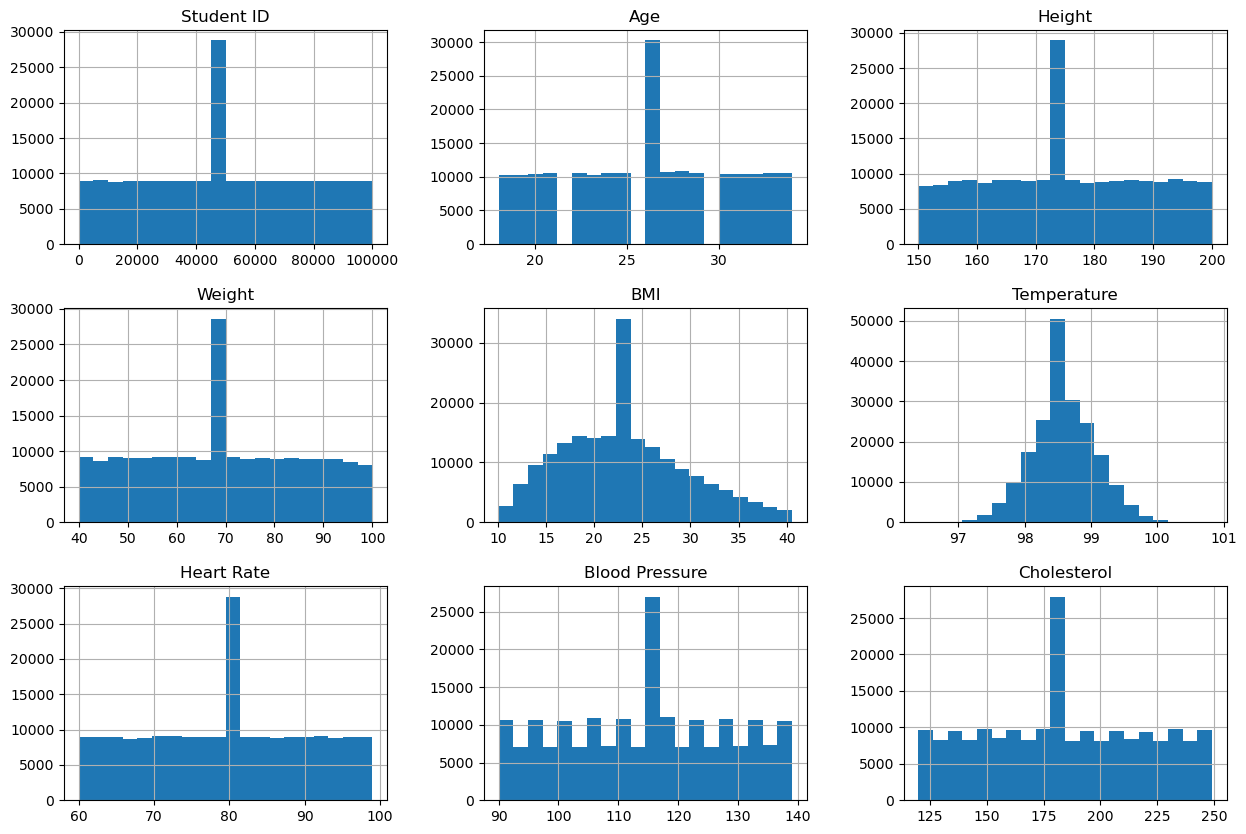

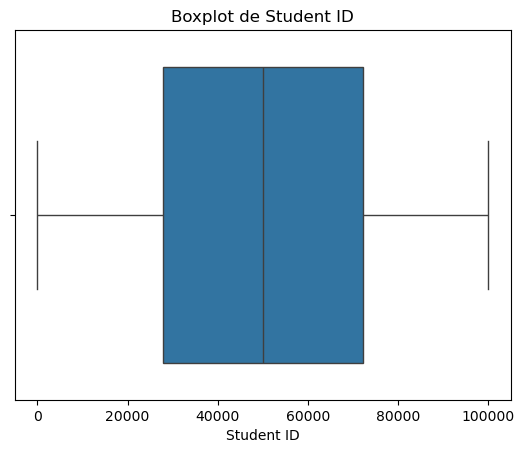

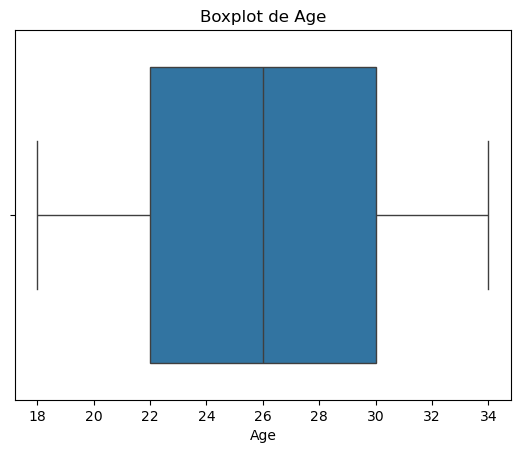

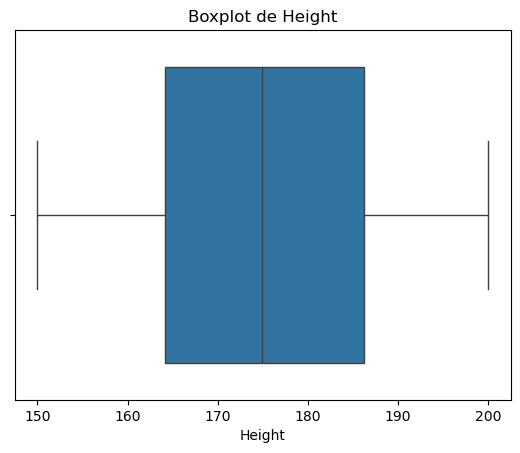

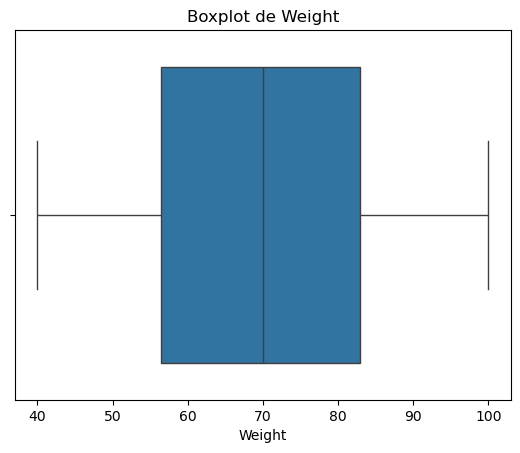

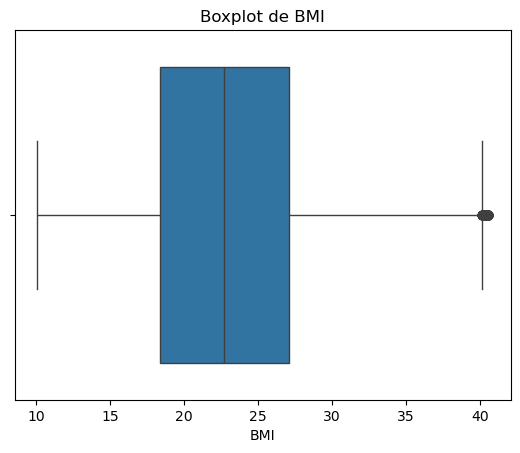

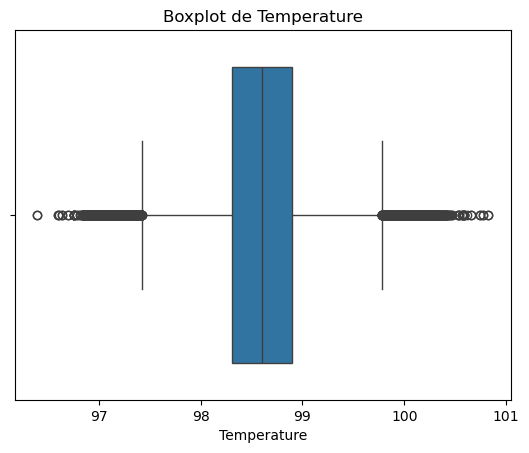

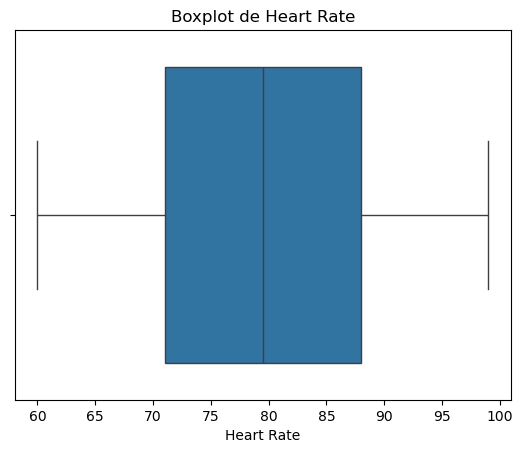

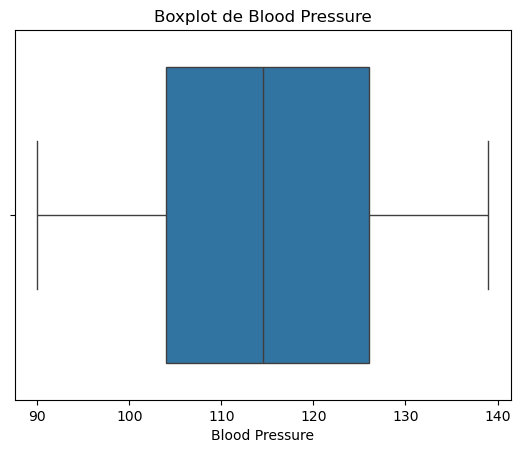

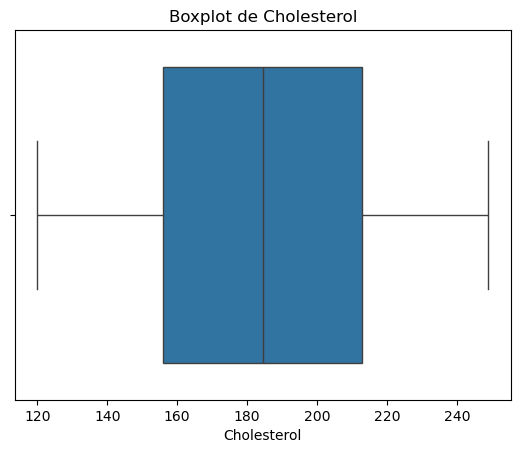

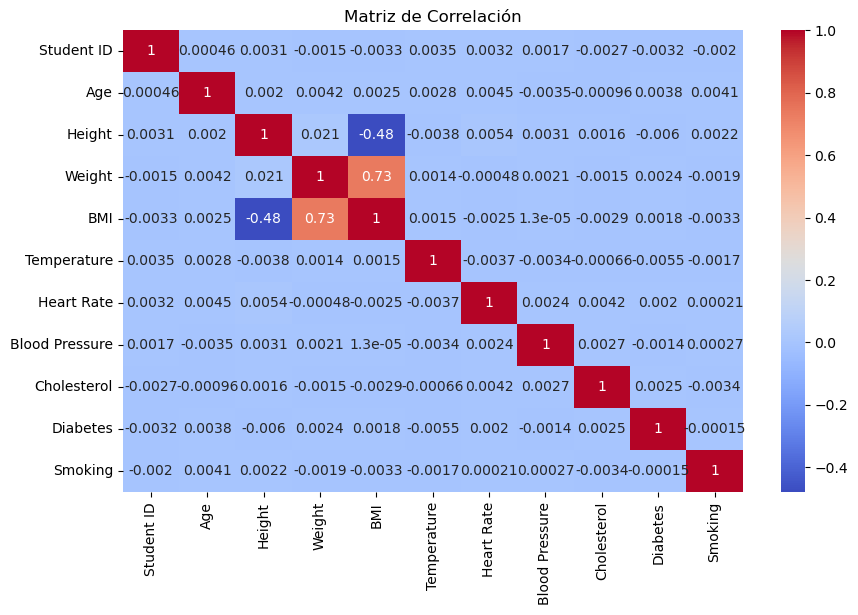

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas para variables numéricas
df_medical.hist(bins=20, figsize=(15, 10))
plt.show()

# Boxplot para detectar outliers
for col in df_medical.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=df_medical[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

# Mapa de calor de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df_medical.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()




In [50]:
# Valores nulos
print("Valores nulos por columna:")
print(df_medical .isnull().sum())

# Tratamiento de valores nulos
# Opciones: rellenar con la media, mediana, moda o eliminar filas/columnas
df_medical.fillna(df_medical.mean(), inplace=True)  # Ejemplo: rellenar valores nulos con la media

# Detectar outliers con el rango intercuartil
for col in df_medical.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_medical[col].quantile(0.25)
    Q3 = df_medical[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_medical[(df_medical[col] < Q1 - 1.5 * IQR) | (df_medical[col] > Q3 + 1.5 * IQR)]
    print(f"Outliers detectados en {col}: {len(outliers)}")


Valores nulos por columna:
Student ID        0
Age               0
Height            0
Weight            0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64
Outliers detectados en Student ID: 0
Outliers detectados en Age: 0
Outliers detectados en Height: 0
Outliers detectados en Weight: 0
Outliers detectados en BMI: 1848
Outliers detectados en Temperature: 3226
Outliers detectados en Heart Rate: 0
Outliers detectados en Blood Pressure: 0
Outliers detectados en Cholesterol: 0


* Dataset de Car_sales

In [9]:
#Cargar el dataset y revisar su estructura básica.
# Cargar el dataset
path = "../data/Car_sales.csv"
df_car = pd.read_csv(path, sep=',')

# Revisar la estructura básica del dataset
print("Primeras 5 filas del dataset:")
print(df_car.head())

print("\nInformación del dataset:")
print(df_car.info())  # Información sobre columnas, tipos de datos y valores nulos.

print("\nDescripción estadística básica:")
print(df_car.describe())  # Estadísticas básicas del dataset.

Primeras 5 filas del dataset:
  Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   
3        Acura       RL               8.588               29.725    Passenger   
4         Audi       A4              20.397               22.255    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.4   
1               28.40          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   
3               42.00          3.5       210.0      114.6   71.4   196.6   
4               23.99          1.8       150.0      102.6   68.2   178.0   

   Curb_weight  Fuel_capac

* climate_Change

In [8]:
#Cargar el dataset y revisar su estructura básica.
# Cargar el dataset
path = "../data/climate_change.csv"
df_climate = pd.read_csv(path, sep=',')

# Revisar la estructura básica del dataset
print("Primeras 5 filas del dataset:")
print(df_climate.head())

print("\nInformación del dataset:")
print(df_climate.info())  # Información sobre columnas, tipos de datos y valores nulos.

print("\nDescripción estadística básica:")
print(df_climate.describe())  # Estadísticas básicas del dataset.

Primeras 5 filas del dataset:
   Year  Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12        TSI  \
0  1983      5  2.556  345.96  1638.59  303.677  191.324  350.113  1366.1024   
1  1983      6  2.167  345.52  1633.71  303.746  192.057  351.848  1366.1208   
2  1983      7  1.741  344.15  1633.22  303.795  192.818  353.725  1366.2850   
3  1983      8  1.130  342.25  1631.35  303.839  193.602  355.633  1366.4202   
4  1983      9  0.428  340.17  1648.40  303.901  194.392  357.465  1366.2335   

   Aerosols   Temp  
0    0.0863  0.109  
1    0.0794  0.118  
2    0.0731  0.137  
3    0.0673  0.176  
4    0.0619  0.149  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float6

* Social_Network_Ads

In [7]:
#Cargar el dataset y revisar su estructura básica.
# Cargar el dataset
url = "../data/Social_Network_Ads.csv"
df_social = pd.read_csv(url, sep=',')

# Revisar la estructura básica del dataset
print("Primeras 5 filas del dataset:")
print(df_social.head())

print("\nInformación del dataset:")
print(df_social.info())  # Información sobre columnas, tipos de datos y valores nulos.

print("\nDescripción estadística básica:")
print(df_social.describe())  # Estadísticas básicas del dataset.


Primeras 5 filas del dataset:
   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None

Descripción estadística básica:
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%  